In [161]:
#K. David Roell CFPB 8/30/2016
#Ingests CSVs of macro edits 
#Writes CSV of macro edits by agency code
#Visualizes edits by number and year
#
import pandas as pd
#from bokeh.io import output_notebook, show
#from bokeh.charts import Line
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
get_ipython().magic(u'matplotlib inline')
matplotlib.style.use('ggplot')


#from bokeh import charts, io, Line
#from bokeh.plotting import figure, show, output_notebook

output_notebook()

Loading BokehJS ...

In [162]:
year = 2014 #start year
macro_dfs = {}
while year > 1991:
    try:
        load_df = pd.read_csv('macro_'+str(year)+'.csv')
        load_df['year'] = year
        #print(load_df.head())
    except OSError as e:
        print("data not loaded for {year}".format(year=year), e)
        break
    macro_dfs[year] = load_df
#    print(load_df.head())
    year -=1

data not loaded for 2006 File b'macro_2006.csv' does not exist


In [163]:
#load all annual CSVs to dictionary
#create new df copy for summary table


for key in macro_dfs.keys():
    summary_df = macro_dfs[key].copy() #copy df to create summary table

    #get counts of macro edits by agency code
    by_agency_df = summary_df.groupby('agency').sum() #produce counts of each edit type
#    by_agency_df.drop('arid', axis=1, inplace=True) #drop arid
    by_agency_df.drop('year', axis=1, inplace=True)
    #add total index and sum each edit count
    sum_df = by_agency_df.sum() #put sums of edits in new frame
    sum_df.name=('total') #name the frame (required to append)
    by_agency_df = by_agency_df.append(sum_df)
    by_agency_df['totals'] = by_agency_df.sum(axis=1)

    by_agency_df['year'] = key
    try:
        print('writing macro_by_agency_{year}'.format(year=key))
        by_agency_df.to_csv('macro_by_agency_'+str(key)+'.csv') #write to file
    except:
        print('not written for {year}'.format(year=key))

writing macro_by_agency_2007
writing macro_by_agency_2008
writing macro_by_agency_2009
writing macro_by_agency_2010
writing macro_by_agency_2011
writing macro_by_agency_2012
writing macro_by_agency_2013
writing macro_by_agency_2014


In [164]:
annuals = {}
#
for key in macro_dfs.keys():
    annuals[key] = macro_dfs[key].copy()
    annuals[key].drop(['agency', 'arid', 'year'], axis=1, inplace=True)
    annuals[key] = annuals[key].count()
    annuals[key].name = str(key)
    #print(key, macro_dfs[key].count())
#    print(annuals[key].head()) 

In [165]:
first = True
for key in annuals.keys():

    if first:
        first = False
        base = pd.DataFrame(annuals[key].copy())
        base = base.T
    else:
        new = pd.DataFrame(annuals[key].copy())
        new = new.T
        base = pd.concat([base, new], axis=0)
base.to_csv('macro_counts_by_year.csv')

In [166]:
graph_df.head()

,q006,q007,q008,q009,q010,q011,q015_count,q015_value,q016,q023,...,q073,q074,q075,q076,q081,q081_denom,q081_numer,q082,q083,year
2007,406,479,394,109,202,995,1041,1041,NaN,1853,...,8,81,32,17,234,234,234,146,899,2007
2008,769,479,325,110,202,4419,1196,1196,4.0,1856,...,10,305,55,30,224,224,224,162,1013,2008
2009,270,405,337,127,187,4237,952,952,2.0,1763,...,9,279,32,15,215,215,215,166,897,2009
2010,200,351,293,107,170,1179,897,897,6.0,1735,...,6,223,18,11,218,218,218,187,913,2010
2011,175,305,269,104,153,764,1078,1078,3.0,1759,...,8,173,14,8,213,213,213,184,906,2011


/Users/roellk/homebrew/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


TypeError: Can't convert 'int' object to str implicitly

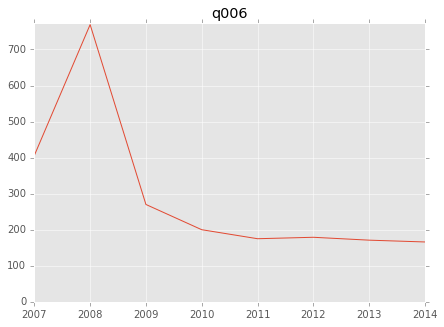

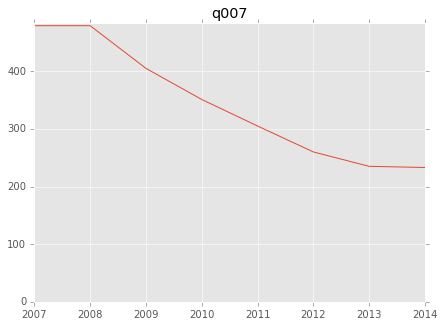

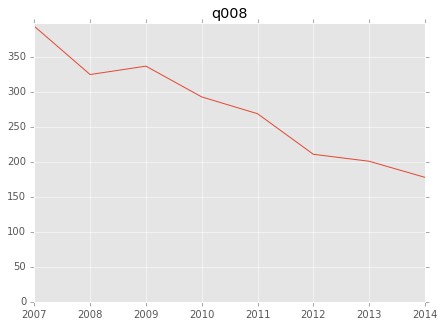

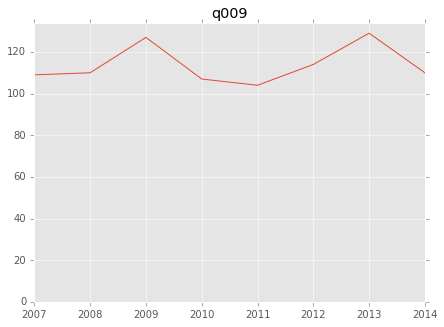

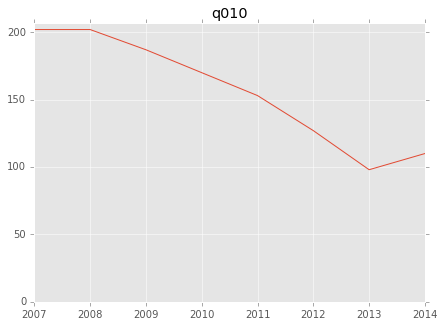

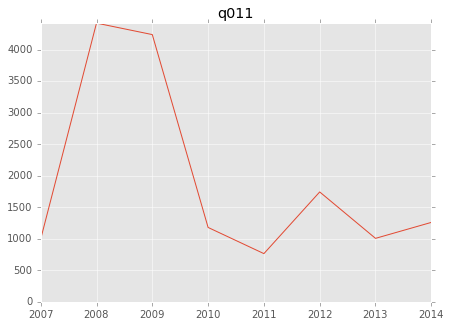

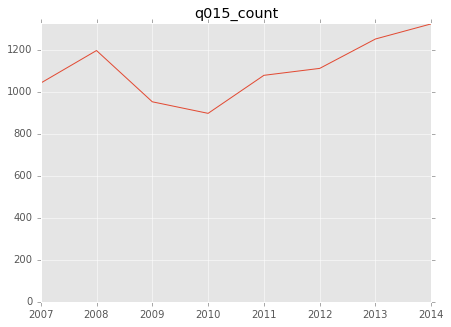

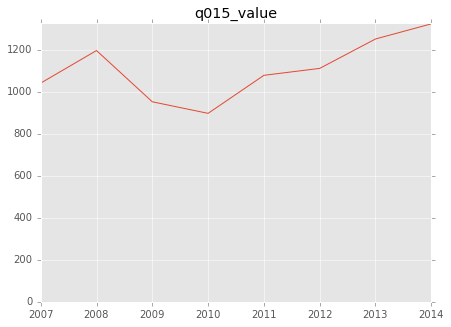

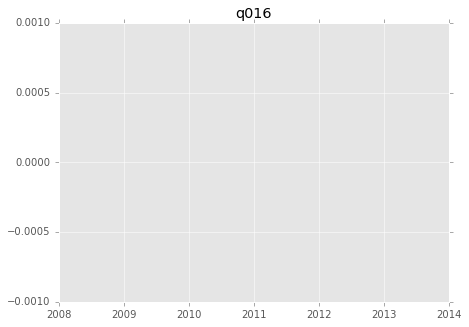

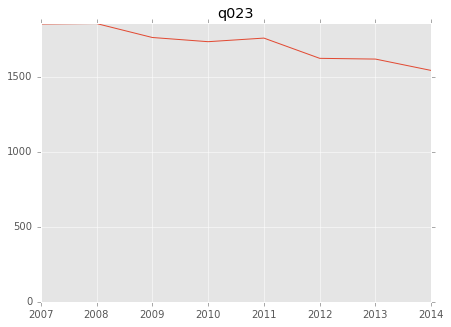

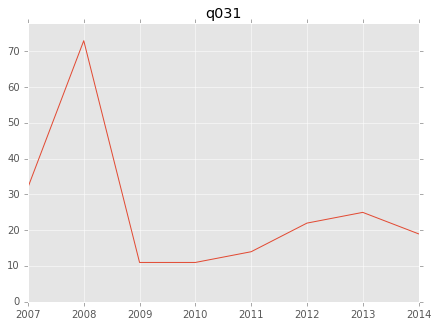

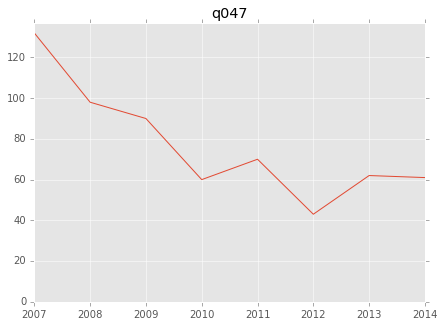

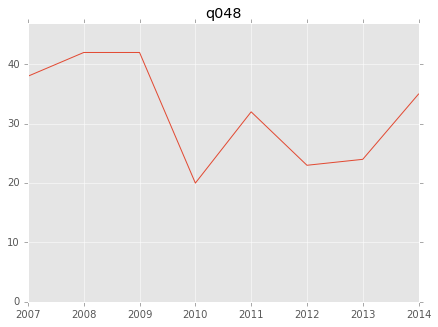

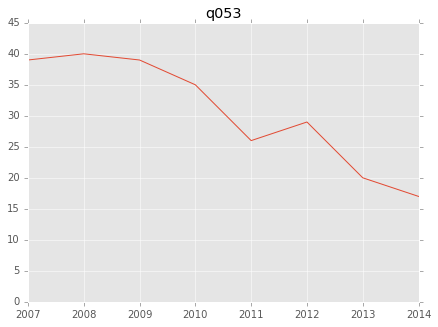

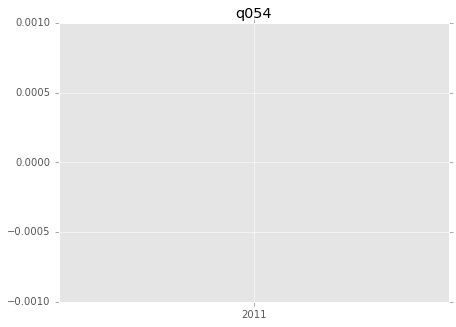

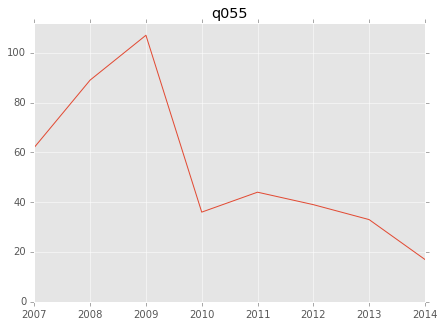

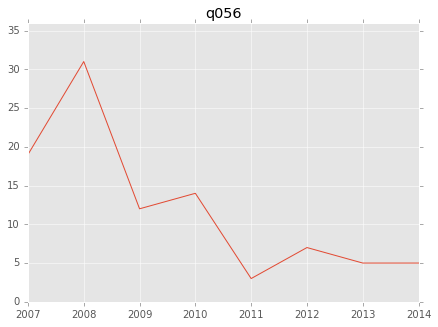

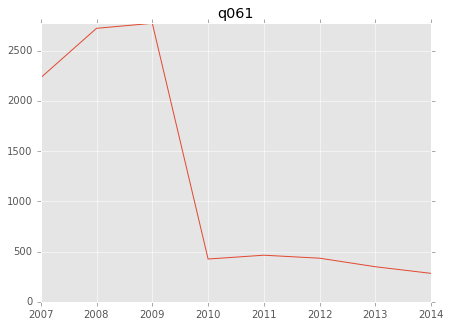

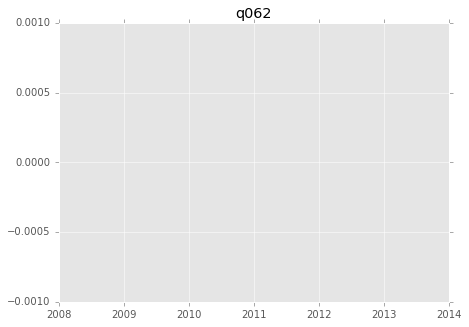

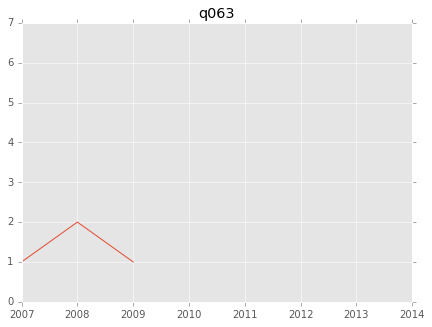

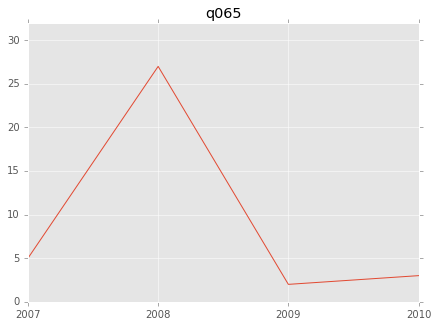

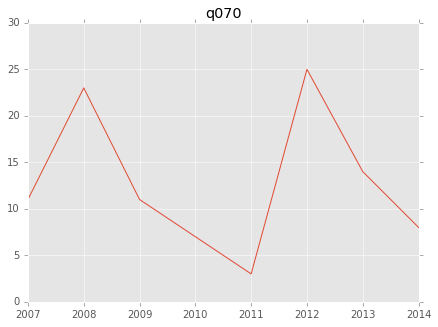

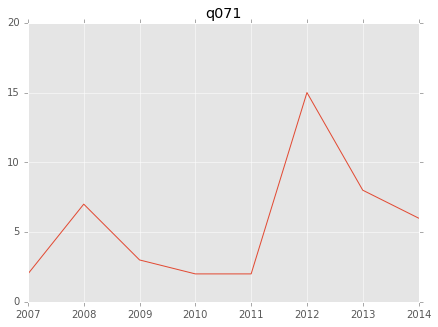

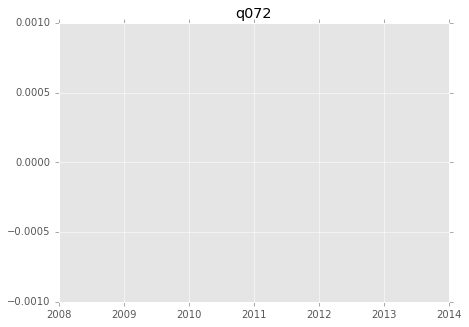

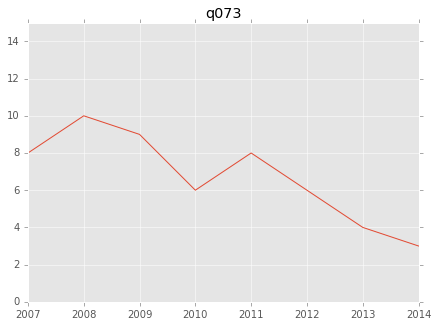

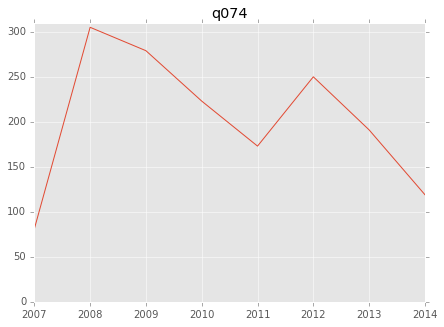

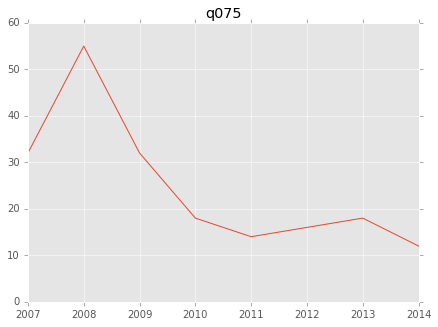

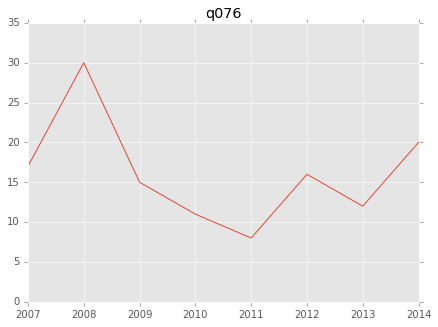

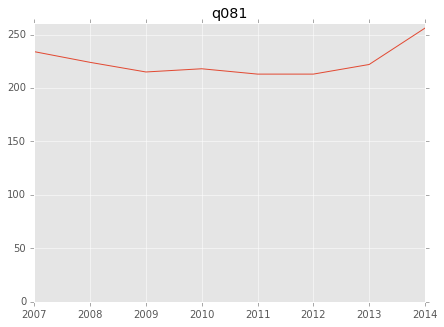

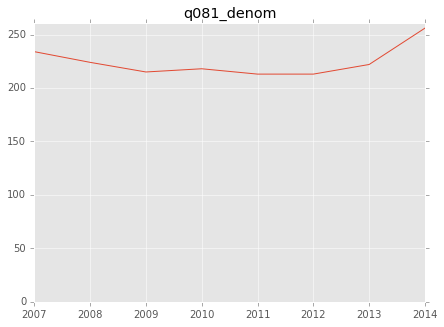

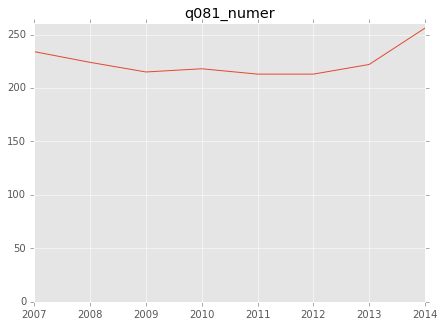

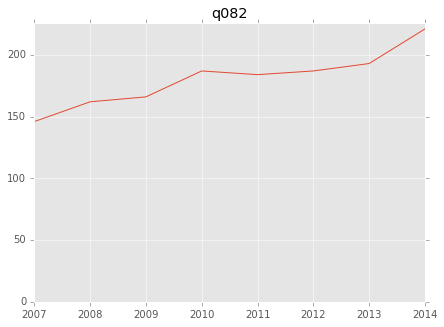

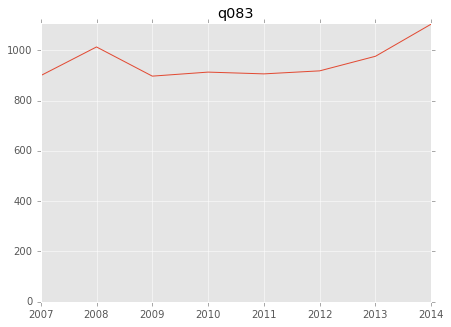

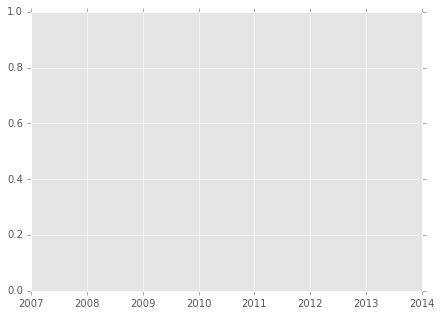

In [168]:

path = 'macro_graphs/'
for col in graph_df.columns:
    y = graph_df[col]
    x = list(range(len(graph_df[col])))
    #print(y)
    #print(x)
    x_ticks = [int(tick[-4:]) for tick in base.index]#list(base.index)
    #x_ticks = np.asarray(x_ticks)
    #print(x_ticks)
    #convert xticks to ndarray
    
    plt.figure(figsize=(7,5))
    plt.xticks(x, x_ticks)
    plt.ylim(0,max(y)+5)
    plt.title(col)
    plt.plot(x, y)
    
    if not os.path.exists(path):
        os.makedirs(path)
    plt.savefig(path + col)